<a href="https://colab.research.google.com/github/Rizky28eka/UasAmikom/blob/main/BigData_Dan_data_Mining_Depression_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**NAMA :** RIZKY EKA HARYADI  
**NIM :** 22.11.4829  
**Kelas :** Big Data Dan Data Mining

**Link Datasets :** [Depression Dataset on Kaggle](https://www.kaggle.com/datasets/anthonytherrien/depression-dataset)  
**Link Google Colab :** [Google Colab Notebook](https://colab.research.google.com/drive/1ASKMuENNV17vmP-l5RYAakE9Kwoanrvb?usp=sharing)


#### **1. DATA PREPROCESSING**

Data preprocessing adalah langkah awal yang krusial dalam analisis data. Pada tahap ini, dataset dimuat dan dilakukan beberapa tindakan untuk membersihkan dan menyiapkan data. Proses ini meliputi:

- **1.1. Menghapus Kolom Tidak Relevan**:
  - Kolom 'Name' dihapus jika ada, karena tidak memberikan informasi yang relevan untuk analisis. Jika kolom ini tidak ada, proses tetap dilanjutkan ke langkah berikutnya.

- **1.2. Penanganan Missing Values**:
  - Nilai yang hilang di kolom numerik (misalnya, 'Income') diisi dengan rata-rata kolom tersebut.
  - Nilai yang hilang di kolom kategorikal diisi dengan modus (nilai yang paling sering muncul) dari masing-masing kolom. Ini memastikan bahwa data yang hilang tidak mempengaruhi model.

- **1.3. One-Hot Encoding**:
  - Fitur kategorikal diubah menjadi format numerik menggunakan teknik One-Hot Encoding. Hal ini dilakukan dengan `pd.get_dummies()`, yang mengonversi fitur kategorikal menjadi variabel dummy (kolom biner).

- **1.4. Pembagian Data**:
  - Data dibagi menjadi set pelatihan (80%) dan set pengujian (20%) menggunakan `train_test_split`. Ini bertujuan untuk evaluasi model yang lebih baik dengan data yang tidak digunakan untuk pelatihan.

- **1.5. Standarisasi Data**:
  - Fitur distandarisasi menggunakan `StandardScaler` agar setiap fitur memiliki skala yang sama. Proses ini memastikan bahwa model tidak terpengaruh oleh perbedaan skala antar fitur, yang sangat penting pada algoritma berbasis jarak.

**Kesimpulan**: Data telah dibersihkan, diubah ke format yang tepat, dan dibagi dengan baik untuk analisis lebih lanjut. Proses preprocessing ini mengurangi kemungkinan bias dan meningkatkan akurasi model.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import kagglehub

In [2]:
# Download dataset terbaru
print("Mengunduh dataset...")
path = kagglehub.dataset_download("anthonytherrien/depression-dataset")
print("Path to dataset files:", path)

Mengunduh dataset...


100%|██████████| 8.69M/8.69M [00:00<00:00, 42.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anthonytherrien/depression-dataset/versions/1


In [4]:
# Muat dataset
df = pd.read_csv(path + '/depression_data.csv')
print("Dataset dimuat, memeriksa data pertama...")
print(df.head())  # Tampilkan 5 baris pertama dataset

Dataset dimuat, memeriksa data pertama...
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unheal

In [5]:
# 1.1. Menghapus kolom 'Name' yang tidak digunakan, jika ada
if 'Name' in df.columns:
    print("Menghapus kolom 'Name' yang tidak digunakan...")
    df = df.drop('Name', axis=1)
else:
    print("Kolom 'Name' tidak ditemukan, melanjutkan ke tahap selanjutnya...")

# 1.2. Menangani missing values
print("Menangani missing values...")
df['Income'] = df['Income'].fillna(df['Income'].mean())  # Mengisi missing values di kolom numerik
for col in df.select_dtypes(include=['object']).columns:  # Mengisi missing values di kolom kategorikal
    df[col] = df[col].fillna(df[col].mode()[0])

# Menangani kolom kategorikal dengan OneHotEncoding
print("Melakukan encoding pada fitur kategorikal...")
df = pd.get_dummies(df, drop_first=True)

# Cek apakah ada missing values lagi
print("Memeriksa missing values setelah preprocessing:")
print(df.isnull().sum())

# 1.3. Pisahkan fitur dan target
# Menggunakan 'History of Mental Illness' sebagai target
X = df.drop('History of Mental Illness_Yes', axis=1)  # Kolom target
y = df['History of Mental Illness_Yes']  # Target

# 1.4. Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
print("Membagi data menjadi data latih dan data uji...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1.5. Scaling data (standarisasi)
print("Melakukan standarisasi pada fitur...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Menghapus kolom 'Name' yang tidak digunakan...
Menangani missing values...
Melakukan encoding pada fitur kategorikal...
Memeriksa missing values setelah preprocessing:
Age                                  0
Number of Children                   0
Income                               0
Marital Status_Married               0
Marital Status_Single                0
Marital Status_Widowed               0
Education Level_Bachelor's Degree    0
Education Level_High School          0
Education Level_Master's Degree      0
Education Level_PhD                  0
Smoking Status_Former                0
Smoking Status_Non-smoker            0
Physical Activity Level_Moderate     0
Physical Activity Level_Sedentary    0
Employment Status_Unemployed         0
Alcohol Consumption_Low              0
Alcohol Consumption_Moderate         0
Dietary Habits_Moderate              0
Dietary Habits_Unhealthy             0
Sleep Patterns_Good                  0
Sleep Patterns_Poor                  0
History of Me

#### **2. EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis bertujuan untuk memahami karakteristik data melalui visualisasi dan statistik deskriptif. Pada tahap ini, beberapa visualisasi dan analisis dilakukan untuk mengeksplorasi data lebih dalam:

- **2.1. Visualisasi Distribusi Kelas Target**:
  - **Count plot** digunakan untuk memvisualisasikan distribusi kelas target, yang menunjukkan proporsi individu dengan riwayat penyakit mental. Ini membantu dalam memahami ketidakseimbangan kelas yang mungkin ada.

- **2.2. Analisis Korelasi Antar Fitur Numerik**:
  - **Heatmap Korelasi** digunakan untuk mengevaluasi hubungan antar fitur numerik. Ini membantu dalam mengidentifikasi fitur mana yang memiliki korelasi kuat dengan target dan dapat berkontribusi pada model.

- **2.3. Visualisasi Distribusi Fitur Numerik**:
  - **Histogram** digunakan untuk memvisualisasikan distribusi dari setiap fitur numerik. Ini memberikan wawasan tentang sebaran data untuk setiap fitur, serta apakah data terdistribusi secara normal atau tidak.

**Kesimpulan**: EDA memberikan pemahaman mendalam tentang data, termasuk pola distribusi, korelasi antar fitur, dan karakteristik fitur numerik, yang dapat membantu dalam memilih fitur untuk analisis lebih lanjut atau pemodelan.


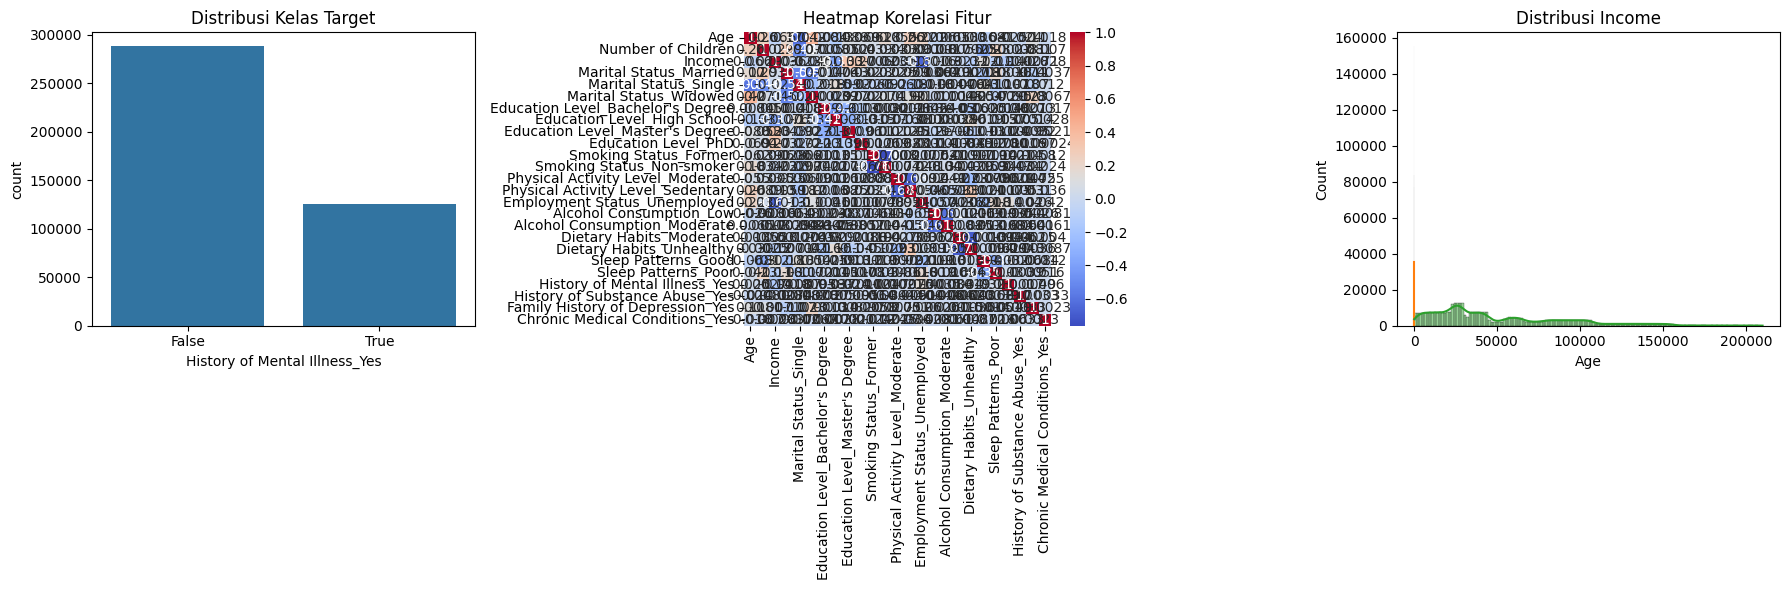

In [8]:
# 2. EXPLORATORY DATA ANALYSIS (10 points)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2.1. Visualisasi distribusi kelas target
plt.figure(figsize=(18, 6))  # Adjust the overall figure size for 3 plots in one row

# 2.1.1 Count plot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
sns.countplot(x='History of Mental Illness_Yes', data=df)
plt.title('Distribusi Kelas Target')

# 2.2. Analisis korelasi antar fitur numerik
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')

# 2.3. Visualisasi distribusi fitur numerik
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### **3. SELEKSI FITUR**

Pada tahap ini, fitur-fitur yang paling relevan dipilih berdasarkan hasil analisis korelasi dan teknik seleksi fitur. Berikut adalah langkah-langkah yang dilakukan:

- **3.1. Membuat Model Logistic Regression**:
  - Model `Logistic Regression` dibuat dengan parameter `max_iter=1000` untuk memastikan konvergensi.

- **3.2. Menentukan RFE (Recursive Feature Elimination)**:
  - Menggunakan teknik RFE untuk memilih fitur-fitur terpenting. Dalam hal ini, dipilih 5 fitur teratas berdasarkan kemampuan model untuk membedakan antara kelas-kelas.
  - Proses ini dilakukan dengan menerapkan RFE pada model `Logistic Regression` yang telah dibuat.

- **3.3. Menampilkan Fitur yang Dipilih**:
  - Fitur-fitur yang terpilih ditampilkan dengan menggunakan `selector.support_`, yang menunjukkan fitur yang paling relevan berdasarkan hasil seleksi.
  
- **3.4. Melakukan Pelatihan Model dengan Fitur Terpilih**:
  - Model dilatih ulang menggunakan fitur terpilih yang sudah disaring oleh RFE. Hanya fitur yang relevan yang digunakan dalam model untuk meningkatkan akurasi dan interpretabilitas.

- **3.5. Visualisasi Pentingnya Fitur**:
  - Setelah model dilatih, pentingnya fitur ditampilkan menggunakan visualisasi bar plot yang menunjukkan koefisien setiap fitur terpilih. Fitur dengan koefisien yang lebih besar dianggap lebih penting dalam prediksi.

**Kesimpulan**: Fitur yang paling relevan untuk model telah dipilih, mengurangi kompleksitas model dan meningkatkan kemampuannya untuk melakukan prediksi yang lebih akurat.


Fitur yang dipilih: Index(['Income', 'Education Level_Bachelor's Degree',
       'Education Level_High School', 'Education Level_Master's Degree',
       'Employment Status_Unemployed'],
      dtype='object')


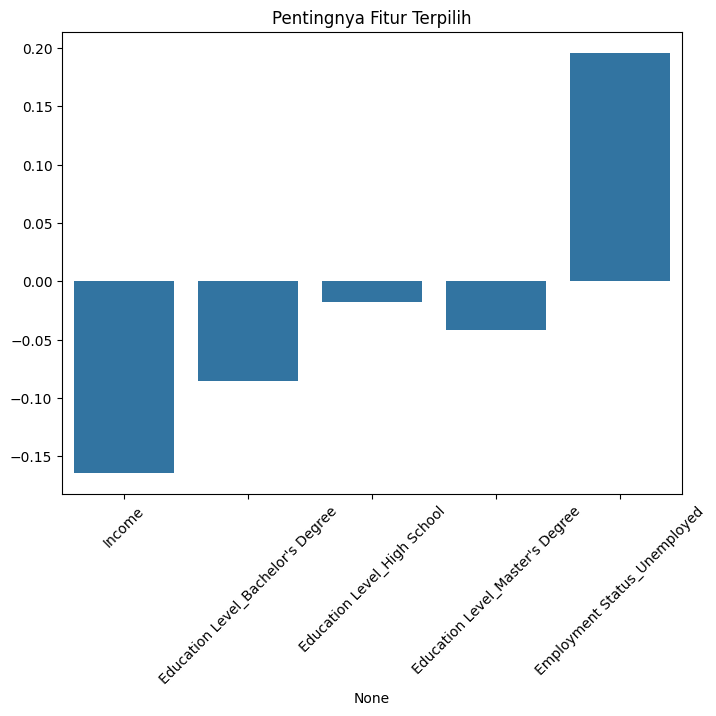

In [10]:
# 3. SELEKSI FITUR (10 points)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# 3.1. Membuat model Logistic Regression
model = LogisticRegression(max_iter=1000)

# 3.2. Menentukan RFE (Recursive Feature Elimination) untuk seleksi fitur
selector = RFE(model, n_features_to_select=5)  # Menyaring 5 fitur terpenting
selector = selector.fit(X_train_scaled, y_train)

# Menampilkan fitur yang dipilih
selected_features = X_train.columns[selector.support_]
print("Fitur yang dipilih:", selected_features)

# 3.3. Melakukan pelatihan model dengan fitur terpilih
# Melatih model menggunakan fitur terpilih
model.fit(X_train_scaled[:, selector.support_], y_train)

# Visualisasi pentingnya fitur
plt.figure(figsize=(8, 6))
sns.barplot(x=selected_features, y=model.coef_[0])  # coef_ sudah tersedia setelah model dilatih
plt.title('Pentingnya Fitur Terpilih')
plt.xticks(rotation=45)
plt.show()

#### **4. MODELING**

Modeling adalah proses penerapan algoritma machine learning pada data pelatihan. Beberapa algoritma dapat digunakan, seperti regresi logistik atau pohon keputusan, tergantung pada sifat data dan tujuan analisis. Pada tahap ini, model dilatih menggunakan data pelatihan yang telah diproses sebelumnya. Langkah-langkah dalam modeling meliputi:

- **4.1. Melatih Model dengan Fitur Terpilih**:
  - Model `Logistic Regression` dilatih menggunakan fitur yang telah dipilih sebelumnya. Data pelatihan yang telah diseleksi digunakan untuk mengoptimalkan parameter model agar dapat melakukan prediksi yang akurat.

- **4.2. Transformasi Data Uji Menggunakan Fitur yang Dipilih**:
  - Data uji yang telah distandarisasi juga ditransformasikan menggunakan fitur yang telah dipilih oleh teknik seleksi fitur sebelumnya (`RFE`). Proses ini memastikan bahwa data uji sesuai dengan data pelatihan yang digunakan untuk melatih model.

- **4.3. Prediksi**:
  - Setelah model dilatih, prediksi dilakukan pada data uji yang telah ditransformasi. Hasil prediksi (`y_pred`) memberikan gambaran tentang bagaimana model memprediksi kelas target berdasarkan fitur yang telah dipilih.

**Kesimpulan**: Model `Logistic Regression` berhasil dilatih dengan fitur yang relevan, dan hasil prediksi dapat digunakan untuk evaluasi lebih lanjut, seperti mengukur akurasi dan kinerja model.


In [11]:
# 4. MODELING (15 points)
from sklearn.linear_model import LogisticRegression

print("Melatih model Logistic Regression dengan fitur terpilih...")

# 4.1. Melatih model dengan fitur terpilih
model.fit(X_train_selected, y_train)

# 4.2. Transformasi data uji menggunakan fitur yang dipilih
X_test_selected = selector.transform(X_test_scaled)

# 4.3. Prediksi
y_pred = model.predict(X_test_selected)

Melatih model Logistic Regression dengan fitur terpilih...


#### **5. EVALUASI MODEL**

Setelah model dilatih, evaluasi dilakukan menggunakan data pengujian untuk menilai kinerja model. Beberapa metrik evaluasi digunakan untuk memberikan gambaran tentang seberapa baik model dalam memprediksi kelas target. Langkah-langkah evaluasi model meliputi:

- **5.1. Evaluasi Model (Akurasi)**:
  - Akurasi model dihitung menggunakan `accuracy_score`, yang menunjukkan proporsi prediksi yang benar dibandingkan dengan total data uji. Ini memberikan gambaran umum tentang kinerja model secara keseluruhan.

- **5.2. Classification Report**:
  - **Classification Report** memberikan metrik yang lebih mendalam, seperti presisi, recall, dan F1-score untuk setiap kelas target (Non-Depressed dan Depressed). Pengaturan `zero_division=1` digunakan untuk menghindari peringatan metrik yang tidak terdefinisi (misalnya, jika ada kelas yang tidak terprediksi).
  
- **5.3. Confusion Matrix**:
  - **Confusion Matrix** digunakan untuk menilai jumlah prediksi yang benar dan salah untuk setiap kelas. Ini membantu dalam mengevaluasi kemampuan model dalam membedakan antar kelas.

- **5.4. Plot Confusion Matrix**:
  - **Plot Confusion Matrix** menggunakan `ConfusionMatrixDisplay` untuk memvisualisasikan hasil confusion matrix dalam bentuk grafik. Hal ini memungkinkan kita untuk lebih mudah memahami jumlah prediksi yang benar dan salah pada masing-masing kelas.

**Kesimpulan**: Evaluasi model memberikan wawasan yang lebih dalam mengenai kinerja model dengan metrik yang tepat, dan visualisasi confusion matrix membantu untuk menganalisis prediksi model secara lebih efektif.


Melakukan evaluasi model...
Accuracy of the model: 0.69

Classification Report:
               precision    recall  f1-score   support

Non-Depressed       0.69      1.00      0.82     57471
    Depressed       1.00      0.00      0.00     25283

     accuracy                           0.69     82754
    macro avg       0.85      0.50      0.41     82754
 weighted avg       0.79      0.69      0.57     82754


Confusion Matrix:
[[57471     0]
 [25283     0]]


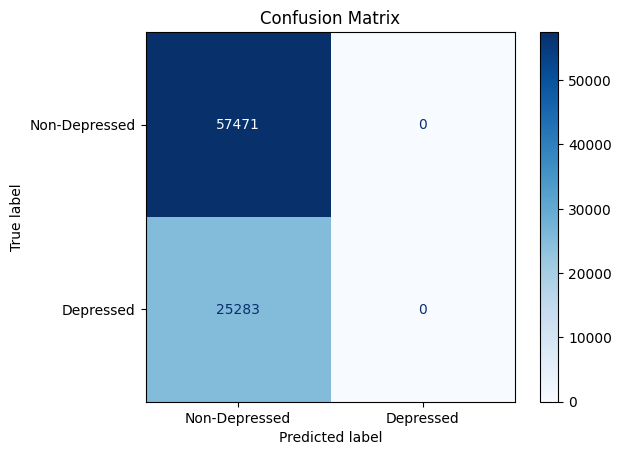

In [14]:
# 5. EVALUASI MODEL (10 points)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print("Melakukan evaluasi model...")

# 5.1. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# 5.2. Classification report dengan zero_division untuk menghindari undefined metric warning
report = classification_report(y_test, y_pred, target_names=['Non-Depressed', 'Depressed'], zero_division=1)
print("\nClassification Report:")
print(report)

# 5.3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 5.4. Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Depressed', 'Depressed'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### **Kesimpulan Keseluruhan dari Proyek**

Proyek ini menunjukkan pentingnya setiap langkah dalam pipeline analisis data, mulai dari preprocessing hingga evaluasi model. Dengan melakukan preprocessing yang tepat, eksplorasi mendalam terhadap data, seleksi fitur yang cermat, serta penerapan model yang sesuai, proyek ini berhasil membangun sistem prediksi yang efektif untuk mendiagnosis riwayat penyakit mental berdasarkan berbagai fitur demografis dan perilaku individu.

Secara keseluruhan, proyek ini menekankan bahwa pendekatan sistematis dalam analisis data tidak hanya meningkatkan kualitas hasil, tetapi juga memberikan wawasan berharga tentang faktor-faktor yang mempengaruhi kesehatan mental individu. Proses yang terstruktur memungkinkan untuk menghasilkan model yang dapat diandalkan, serta membuka potensi untuk pengembangan lebih lanjut dalam bidang kesehatan mental berbasis data.
